# Traitement de texte NLP

## Encodage 

Encodage classique: ASCII, UTF-8, ISO-8859-1 (INSEE...)

tokenisation: on transforme une phrase en une suite de tokens, c.a.d suite de mots ou de fragments de mots (ou de lettres).

tezte -> suite de tokens -> suite de nombres 

In [8]:
#pip install tiktoken 

In [1]:
# utilisation basique de tokenizer de openAI
import tiktoken 

In [3]:
enc = tiktoken.get_encoding('cl100k_base')

In [5]:
print (enc.encode("hello world"))  #ici , 2 token (2 mots)

[15339, 1917]


In [7]:
print(enc.encode("est-ce que tu comprends le français"))

[478, 54312, 1744, 9964, 60946, 82, 514, 55467]


In [9]:
# l'operation inverse
print(enc.decode([15339, 1917]))

hello world


In [11]:
print(enc.decode([15339, 1917]))

hello world


In [13]:
print(enc.decode([478, 54312, 1744, 9964, 60946, 82]))

est-ce que tu comprends


#  Exercice :

combien de tokens in sherlock.txt ?

# Exemple avec keras 

In [17]:
# selon F. Chollet (auteur de keras)
samples = ['The cat sat on the cart','The dog ate my homework']

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
# on va prendre un dictionnaire de 10000 mots les plus fréquents
tok = Tokenizer(num_words=10000)

In [21]:
tok.fit_on_texts(samples)

In [22]:
tok.index_word  #  dictionnaire nombre -> mot, adapte aux textes données

{1: 'the',
 2: 'cat',
 3: 'sat',
 4: 'on',
 5: 'cart',
 6: 'dog',
 7: 'ate',
 8: 'my',
 9: 'homework'}

In [23]:
# bijection inverse:
tok.word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'cart': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

# Classification de textes (depeches de Reuters)

In [25]:
# préparation d'un dataset

#une phrase par ligne, 
#le nombre de colonne est constant pour toutes les lignes/phrases
# et donc egale au nombre de mots dans le dictionnaire

# Ce type d'encodage de phrases s'appelle BAG OF WORDS

seq = tok.texts_to_matrix(samples)
seq


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [32]:
seq.shape

(2, 10000)

In [34]:
seq[:, 0:15]

array([[0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.]])

### REMARQUE 

Bag of Words oubli toute information relative à l'ordre des mots dans les phrases !!

In [37]:
# depeches Reuters
from keras.datasets import reuters

In [39]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [41]:
train_data   # déja tokenisé 

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [43]:
train_data.shape  # environ 9k depeches

(8982,)

In [45]:
len(train_data[0])  # longeur d'une depeche

87

In [47]:
len(train_data[1])

56

In [49]:
word_index = reuters.get_word_index()   # dictionary des tokens (ici mots)

In [51]:
word_index['master']

6962

In [53]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [55]:
min(train_labels), max(train_labels)   # 46 labels, c.a.d domaines d'information : "sport", "politique" etc

(0, 45)

In [57]:
# il s'agit donc d'une tache de classification de depeches en 46 domaines.

In [59]:
# Decodage d'une depeche (avoir index_word): inverser le dictionnaire
index_word = dict(
    [(value, key) for (key, value) in word_index.items()]
)

In [61]:
index_word[6962]

'master'

In [63]:
dep = [index_word[ind] for ind in train_data[0]]
' '.join(dep)  # BAG OF WORDS

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [65]:
import numpy as np 

In [67]:
# pré-traitement : formater les données pour le réseau 

# conversion en une matrice
x_train = np.zeros((len(train_data), 10000))
# nombre des lignes = nombre de depeches; 10000 = nombres des mots dans le dictionnaire

for i, depnum in enumerate(train_data):
    # i : numero de depeche pour le placement dans la matrice x_train
    # depnum : suite des codes/nombres representant la depeche comme ci-dessus
    # representation "one-hot" / bag of words
    # on met 1 dans TOUTES les colonnes correspondant aux mots de la depeche
    x_train[i, depnum] = 1

x_test = np.zeros((len(test_data), 10000))
for i, depnum in enumerate(test_data):
    x_test[i, depnum] = 1

In [69]:
x_train[0:5, :]  # 5 premiere depeches

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [71]:
# conversion des labels en one-hot

from keras.utils import to_categorical   # cela depend de la version de keras...
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train.shape  # 46

(8982, 46)

## Simple réseau dense de classification 


In [74]:
from keras import models, layers

In [76]:
model = models.Sequential([
    layers.Input(shape=(10000, )),  # on ne précise pas le nombre d'exemple, mais la dimensionnalité d'un exemple
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')  # sortie, classification 46 labels
])

In [78]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']
)

In [80]:
hist = model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=128,
          validation_split=0.1)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4932 - loss: 2.4858 - val_acc: 0.7186 - val_loss: 1.3657
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7697 - loss: 1.0796 - val_acc: 0.7597 - val_loss: 1.1392
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8589 - loss: 0.6764 - val_acc: 0.7842 - val_loss: 1.0327
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9084 - loss: 0.4429 - val_acc: 0.8031 - val_loss: 0.9924
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9281 - loss: 0.3498 - val_acc: 0.7887 - val_loss: 0.9661
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9468 - loss: 0.2538 - val_acc: 0.7653 - val_loss: 1.0676
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9519 - loss: 0.2189 - val_acc: 0.7798 - val_loss: 1.0476
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9551 - loss: 0.1806 - val_acc: 0.6986 - val_loss: 1.4099
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9564 - loss: 

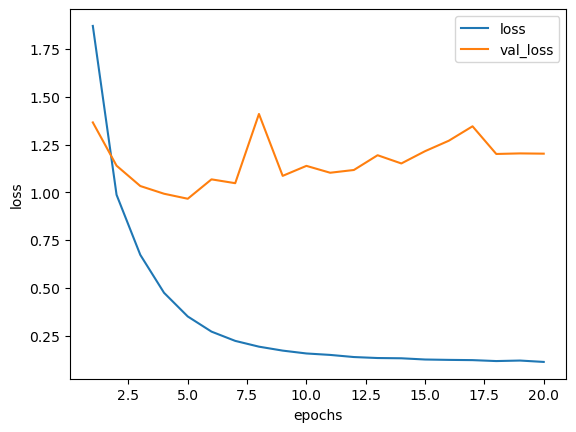

In [94]:
# progression de l'apprentissage 
import matplotlib.pyplot as plt
loss = hist.history['loss']
epochs = range(1, len(loss)+1)  # pour l'axe des abscisses
plt.plot(epochs, loss, label='loss')
val_loss = hist.history['val_loss']
plt.plot(epochs, val_loss, label='val_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## Remarque 

On observe un sur-apprentissage (cf.validation loss qui grandit)

On aurait pu / du utiliser le callback EarlyStopping

A to'on perdu beaucoup en accuracy (sur l'ensemble de test) ?

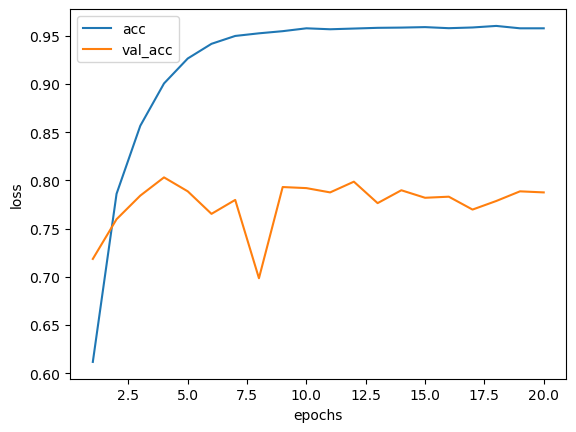

In [97]:

loss = hist.history['acc']
epochs = range(1, len(loss)+1)  # pour l'axe des abscisses
plt.plot(epochs, loss, label='acc')
val_loss = hist.history['val_acc']
plt.plot(epochs, val_loss, label='val_acc')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [103]:
# val_acc : pas optimale, mais pas catastrophique non plus 
# Comparer avec l'ensemble de test/

score = model.evaluate(x_test, y_test)
print(f"accuracy en test = {score[1]}")  # score = [loss, accuracy]

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - acc: 0.7906 - loss: 1.1110
accuracy en test = 0.7845057845115662


finalement pas trop de surapprentissage, le resultat final est tout a fait acceptable par rapport a la dynamique de l'apprentissage 